### Analisis de asociaciones (market basket analysis)

In [3]:
my_basket=[['bread','butter','wine','bananas','coffee','carrots'],
           ['tomatoes','onions','cheese','milk','potatoes'],
           ['beer','chips','asparagus','salsa','milk','apples'],
           ['olive oil','bread','butter','tomatoes','steak','carrots'],
           ['tomatoes','onions','chips','wine','ketchup','orange juice'],
           ['bread','butter','beer','chips','milk'],
           ['butter','tomatoes','carrots','coffee','sugar'],
           ['tomatoes','onions','cheese','milk','potatoes'],
           ['bread','butter','ketchup','coffee','chicken wings'],
           ['butter','beer','chips','asparagus','apples'],
           ['tomatoes','onion','beer','chips','milk','coffee']]

In [4]:
def get_metrics(x,y):
    fx_ = sum(x in i for i in my_basket)
    fy_ = sum(y in i for i in my_basket)
    fxy_ = sum([all(z in i for z in [x,y]) for i in my_basket])
    # Metricas
    support = fxy_/len(my_basket)
    confidence = support/(fx_/len(my_basket))
    lift = confidence/(fy_/len(my_basket))
    return support,confidence,lift

In [5]:
get_metrics('bread','butter')

(0.36363636363636365, 1.0, 1.8333333333333335)

In [6]:
import numpy as np
import pandas as pd

In [7]:
groceries = pd.read_csv('groceries.csv', sep=';')
groceries.head()

,ID,Transaction
0,0,"milk,bread,biscuit"
1,1,"bread,milk,biscuit,cereal"
2,2,"bread,tea"
3,3,"jam,bread,milk"
4,4,"tea,biscuit"


In [8]:
# Separar productos individuales
transactions = list(groceries['Transaction'].apply(lambda x: sorted(x.split(','))))
transactions

[['biscuit', 'bread', 'milk'],
 ['biscuit', 'bread', 'cereal', 'milk'],
 ['bread', 'tea'],
 ['bread', 'jam', 'milk'],
 ['biscuit', 'tea'],
 ['bread', 'tea'],
 ['cereal', 'tea'],
 ['biscuit', 'bread', 'tea'],
 ['bread', 'jam', 'tea'],
 ['bread', 'milk'],
 ['biscuit', 'cereal', 'coffee', 'orange'],
 ['biscuit', 'cereal', 'coffee', 'orange'],
 ['coffee', 'sugar'],
 ['bread', 'coffee', 'orange'],
 ['biscuit', 'bread', 'sugar'],
 ['cereal', 'coffee', 'sugar'],
 ['biscuit', 'bread', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['cereal', 'coffee', 'milk', 'tea']]

In [9]:
# Tabla binaria
from mlxtend.preprocessing import TransactionEncoder
enc = TransactionEncoder().fit(transactions)
onehot = enc.transform(transactions)
onehot

array([[ True,  True, False, False, False,  True, False, False, False],
       [ True,  True,  True, False, False,  True, False, False, False],
       [False,  True, False, False, False, False, False, False,  True],
       [False,  True, False, False,  True,  True, False, False, False],
       [ True, False, False, False, False, False, False, False,  True],
       [False,  True, False, False, False, False, False, False,  True],
       [False, False,  True, False, False, False, False, False,  True],
       [ True,  True, False, False, False, False, False, False,  True],
       [False,  True, False, False,  True, False, False, False,  True],
       [False,  True, False, False, False,  True, False, False, False],
       [ True, False,  True,  True, False, False,  True, False, False],
       [ True, False,  True,  True, False, False,  True, False, False],
       [False, False, False,  True, False, False, False,  True, False],
       [False,  True, False,  True, False, False,  True, False, 

In [10]:
onehot = pd.DataFrame(onehot, columns=enc.columns_)
onehot.head()

,biscuit,bread,cereal,coffee,jam,milk,orange,sugar,tea
0,True,True,False,False,False,True,False,False,False
1,True,True,True,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,True
3,False,True,False,False,True,True,False,False,False
4,True,False,False,False,False,False,False,False,True


In [11]:
# Obtener los conjuntos de productos frecuentes
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(onehot, min_support=0.01, use_colnames=True, max_len=3)
frequent_itemsets.head(10)

,support,itemsets
0,0.40,(biscuit)
1,0.65,(bread)
2,0.30,(cereal)
3,0.40,(coffee)
4,0.10,(jam)
5,0.25,(milk)
6,0.15,(orange)
7,0.30,(sugar)
8,0.35,(tea)
9,0.25,"(biscuit, bread)"


In [12]:
frequent_itemsets.tail(5)

,support,itemsets
49,0.10,"(coffee, cereal, orange)"
50,0.05,"(sugar, coffee, cereal)"
51,0.05,"(coffee, cereal, tea)"
52,0.05,"(cereal, tea, milk)"
53,0.05,"(coffee, tea, milk)"


In [13]:
# Reglas de asociación
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(cereal),(biscuit),0.30,0.40,0.15,0.500000,1.250000,0.0300,1.200000,0.285714
1,(biscuit),(cereal),0.40,0.30,0.15,0.375000,1.250000,0.0300,1.120000,0.333333
2,(biscuit),(milk),0.40,0.25,0.10,0.250000,1.000000,0.0000,1.000000,0.000000
3,(milk),(biscuit),0.25,0.40,0.10,0.400000,1.000000,0.0000,1.000000,0.000000
4,(biscuit),(orange),0.40,0.15,0.10,0.250000,1.666667,0.0400,1.133333,0.666667
...,...,...,...,...,...,...,...,...,...,...
111,"(coffee, milk)",(tea),0.05,0.35,0.05,1.000000,2.857143,0.0325,inf,0.684211
112,"(tea, milk)",(coffee),0.05,0.40,0.05,1.000000,2.500000,0.0300,inf,0.631579
113,(coffee),"(tea, milk)",0.40,0.05,0.05,0.125000,2.500000,0.0300,1.085714,1.000000
114,(tea),"(coffee, milk)",0.35,0.05,0.05,0.142857,2.857143,0.0325,1.108333,1.000000


In [14]:
# Reglas que tengan dos elementos en el antecedente (lhs)
rules['lhs_items'] = rules['antecedents'].apply(lambda x: len(x))
rules[rules['lhs_items'] > 1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs_items
58,"(coffee, biscuit)",(orange),0.10,0.15,0.10,1.000000,6.666667,0.0850,inf,0.944444,2
52,"(cereal, biscuit)",(orange),0.15,0.15,0.10,0.666667,4.444444,0.0775,2.55,0.911765,2
64,"(cereal, bread)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,0.789474,2
110,"(coffee, tea)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,0.789474,2
41,"(coffee, biscuit)",(cereal),0.10,0.30,0.10,1.000000,3.333333,0.0700,inf,0.777778,2


In [15]:
# Convertir a tabla con 'lift' como pivote
# Cambiar 'frozenset' a 'str'
rules['antecedents_'] = rules['antecedents'].apply(lambda x: ','.join(list(x)))
rules['consequents_'] = rules['consequents'].apply(lambda x: ','.join(list(x)))
# Crear tabla pivote
pivot = rules[rules['lhs_items'] > 1].pivot(index='antecedents_', columns='consequents_', values='lift')
pivot

consequents_,biscuit,bread,cereal,coffee,jam,milk,orange,sugar,tea
antecedents_,,,,,,,,,
"biscuit,bread",NaN,NaN,NaN,NaN,NaN,1.600000,NaN,1.333333,NaN
"biscuit,milk",NaN,1.538462,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
"biscuit,orange",NaN,NaN,3.333333,2.500000,NaN,NaN,NaN,NaN,NaN
"bread,milk",1.250000,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN
"bread,orange",NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN
"bread,tea",NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN
"cereal,biscuit",NaN,NaN,NaN,1.666667,NaN,1.333333,4.444444,NaN,NaN
"cereal,bread",2.500000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
"cereal,milk",1.250000,NaN,NaN,1.250000,NaN,NaN,NaN,NaN,1.428571


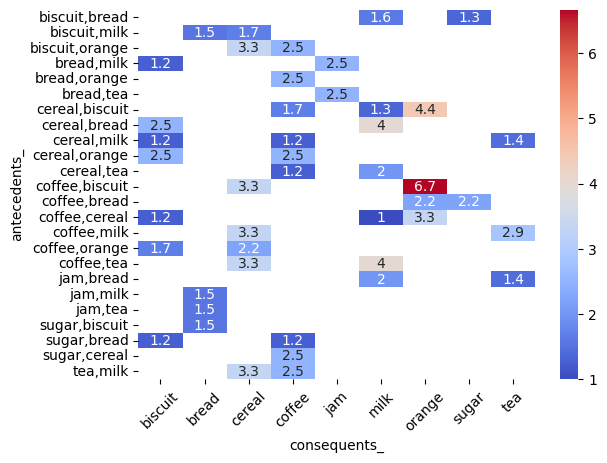

In [16]:
# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

### **Tarea:**

Utilizando el conjunto de datos *Online Retail:*

https://archive.ics.uci.edu/dataset/352/online+retail

Obtener un conjunto de articulos frecuentes asi como reglas de asociaciones que se pueden extraer del mismo.

In [17]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 

In [18]:
print(online_retail.metadata) 
# variable information 
print(online_retail.variables) 

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

In [19]:
data = online_retail.data.features
data.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [20]:
ids = online_retail.data.ids
ids.head()

,InvoiceNo,StockCode
0,536365,85123A
1,536365,71053
2,536365,84406B
3,536365,84029G
4,536365,84029E


In [21]:
# Concatear los ids con los datos
data = pd.concat([ids, data], axis=1)
data.head()

# drop unnecessary columns
data = data.drop('CustomerID', axis=1)
data = data.drop('Country', axis=1)
data = data.drop('InvoiceDate', axis=1)
data = data.drop('Description', axis=1)
data = data.drop('UnitPrice', axis=1)
data = data.drop('Quantity', axis=1)
data.head()

,InvoiceNo,StockCode
0,536365,85123A
1,536365,71053
2,536365,84406B
3,536365,84029G
4,536365,84029E


In [22]:
# Tengo que hacer un preprocesamiento de los datos para que queden en el formato correcto para el algoritmo apriori.
# En mi dataset los productos están en la columna 'StockCode' y los numeros de las facturas en la columna 'InvoiceNo'.
# Para que el algoritmo apriori funcione correctamente, necesito que los datos estén en el formato de lista de listas.
# Cada lista es una transacción y cada elemento de la lista es un producto.
# Primero, agrupo los productos por el número de la factura y luego convierto los productos en una lista.
# Finalmente, convierto los datos en una lista de listas.
# Agrupar los productos por el número de la factura
data_grouped = data.groupby('InvoiceNo')['StockCode'].apply(list)
data_grouped.head()

# Convertir los datos en una lista de listas
transactions = data_grouped.values.tolist()
transactions[:5]

# Tabla binaria
enc = TransactionEncoder().fit(transactions)
onehot = enc.transform(transactions)
onehot = pd.DataFrame(onehot, columns=enc.columns_)
onehot.head()

,10002,10080,10120,10123C,10123G,10124A,10124G,10125,10133,10134,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
# Obtener los conjuntos de productos frecuentes
frequent_itemsets = apriori(onehot, min_support=0.01, use_colnames=True, max_len=3)
frequent_itemsets.head(10)

,support,itemsets
0,0.020193,(15036)
1,0.012587,(15056BL)
2,0.017876,(15056N)
3,0.011236,(16237)
4,0.012510,(20675)
5,0.017413,(20676)
6,0.012896,(20677)
7,0.012703,(20679)
8,0.027181,(20685)
9,0.020541,(20711)


In [24]:
# Reglas de asociación
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(20711),(20712),0.020541,0.033668,0.011158,0.543233,16.135019,0.010467,2.115591,0.957695
1,(20712),(20711),0.033668,0.020541,0.011158,0.331422,16.135019,0.010467,1.464989,0.970705
2,(20711),(21931),0.020541,0.046371,0.011506,0.560150,12.079846,0.010553,2.168080,0.936453
3,(21931),(20711),0.046371,0.020541,0.011506,0.248127,12.079846,0.010553,1.302692,0.961818
4,(20711),(22386),0.020541,0.047529,0.010888,0.530075,11.152679,0.009912,2.026858,0.929426
...,...,...,...,...,...,...,...,...,...,...
1295,"(23202, 23203)",(85099B),0.020000,0.082432,0.011429,0.571429,6.932084,0.009780,2.140991,0.873207
1296,"(85099B, 23203)",(23202),0.022471,0.034208,0.011429,0.508591,14.867391,0.010660,1.965352,0.954180
1297,(23202),"(85099B, 23203)",0.034208,0.022471,0.011429,0.334086,14.867391,0.010660,1.467950,0.965776
1298,(85099B),"(23202, 23203)",0.082432,0.020000,0.011429,0.138642,6.932084,0.009780,1.137738,0.932622


In [26]:
# Reglas que tengan dos elementos en el antecedente (lhs)
rules['lhs_items'] = rules['antecedents'].apply(lambda x: len(x))
rules[rules['lhs_items'] > 1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_,consequents_,lhs_items
1108,"(21086, 21080)",(21094),0.011429,0.020347,0.010232,0.895270,43.999051,0.009999,9.354101,0.988570,"21086,21080",21094,2
1110,"(21094, 21080)",(21086),0.014286,0.016525,0.010232,0.716216,43.341121,0.009996,3.465578,0.991086,"21094,21080",21086,2
1282,"(23203, 23199)",(23200),0.016564,0.023243,0.010425,0.629371,27.077574,0.010040,2.635400,0.979290,"23203,23199",23200,2
864,"(20719, 22356)",(20723),0.015328,0.028340,0.010193,0.664987,23.464814,0.009759,2.900369,0.972286,"20719,22356",20723,2
858,"(22355, 20719)",(20723),0.017722,0.028340,0.011737,0.662309,23.370317,0.011235,2.877368,0.974480,"22355,20719",20723,2


In [27]:
# Convertir a tabla con 'lift' como pivote
# Cambiar 'frozenset' a 'str'
rules['antecedents_'] = rules['antecedents'].apply(lambda x: ','.join(list(x)))
rules['consequents_'] = rules['consequents'].apply(lambda x: ','.join(list(x)))
# Crear tabla pivote
pivot = rules[rules['lhs_items'] > 1].pivot(index='antecedents_', columns='consequents_', values='lift')
pivot

consequents_,20712,20719,20723,20724,20725,20726,20727,20728,21080,21086,...,22730,23199,23200,23202,23203,23206,85099B,85099C,85099F,DOT
antecedents_,,,,,,,,,,,,,,,,,,,,,
"20712,22386",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.654254,NaN,NaN,NaN
"20712,85099B",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.510655
"20719,22356",NaN,NaN,23.464814,20.255248,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"20723,20719",NaN,NaN,NaN,19.830065,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"20723,22355",NaN,22.344441,NaN,19.827751,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"85099B,85099F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"85099C,22386",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.542006,NaN,NaN,NaN
"DOT,20712",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.173970,NaN,NaN,NaN


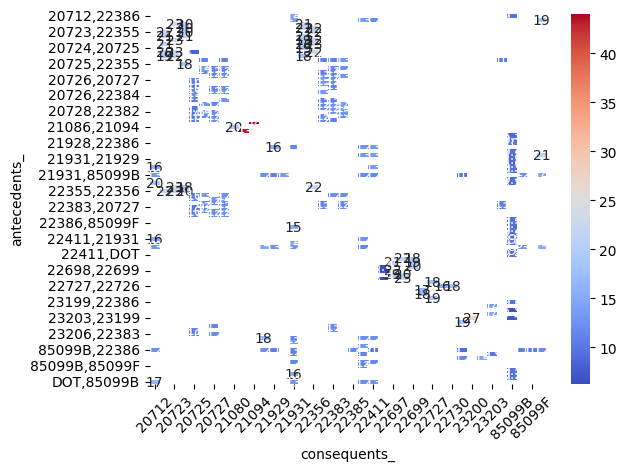

In [28]:
# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()